In [ ]:
#Importing essential libraries for data manipulation, numerical operations, and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Uploading dataset
admissionData = pd.read_csv('Admission_Predict.csv')

In [ ]:
admissionData.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [ ]:
admissionData.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

In [ ]:
# checking for null values
admissionData.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# checking wether data set is imbalanced or not
admissionData['Chance of Admit'].value_counts()

Chance of Admit
0    220
1    180
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Divide dataset into features and target and scale the features to fit data
X = admissionData.drop(['Serial No.','Chance of Admit'], axis=1)
y = admissionData['Chance of Admit']
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

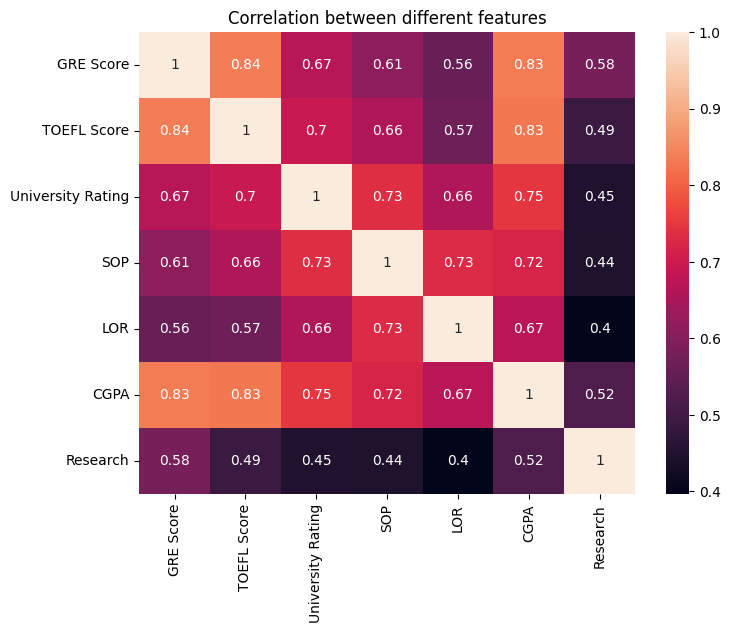

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(),annot=True)
plt.title("Correlation between different features")
plt.show()

In [ ]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,-1.379448,-1.717277,-0.952029,-0.397769,-0.504260,-1.207118,0.909112
23,1.500310,1.911935,1.674257,1.591075,1.167321,1.848771,0.909112
299,-1.030386,0.757186,-0.076600,-0.397769,0.052933,0.085758,-1.099975
13,-0.855855,0.262293,-0.076600,0.596653,-0.504260,-1.005631,0.909112
90,0.104064,-0.232599,-0.952029,0.596653,0.610127,-1.139956,0.909112


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 7)
(80, 7)
(320,)
(80,)


In [ ]:
# using Logistic regression to fit data

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [ ]:
# checking accuracy and precision

from sklearn.metrics import accuracy_score,classification_report

print(f"Test accuracy is {accuracy_score(predictions,y_test)}\n")
print(classification_report(predictions,y_test))

Test accuracy is 0.9

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        45
           1       0.86      0.91      0.89        35

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80



In [ ]:
train_predictions = model.predict(X_train)

print(f"Train accuracy is {accuracy_score(train_predictions,y_train)}\n")
print(classification_report(train_predictions,y_train))

Train accuracy is 0.88125

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       183
           1       0.85      0.88      0.86       137

    accuracy                           0.88       320
   macro avg       0.88      0.88      0.88       320
weighted avg       0.88      0.88      0.88       320



In [ ]:
# Applying decision tree classifier to the data
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train,y_train)
tree_predictions = tree_model.predict(X_test)

In [ ]:
tree_train_predictions = tree_model.predict(X_train)

In [ ]:
# checking accuracy and prediction on the training data

print(f"Train accuracy is {accuracy_score(tree_train_predictions,y_train)}")
print(classification_report(tree_train_predictions,y_train))

Train accuracy is 0.88125
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       189
           1       0.83      0.90      0.86       131

    accuracy                           0.88       320
   macro avg       0.88      0.88      0.88       320
weighted avg       0.89      0.88      0.88       320



In [ ]:
# checking accuracy and prediction to the test data

print(f"Test accuracy is {accuracy_score(tree_predictions,y_test)}")
print(classification_report(tree_predictions,y_test))

Test accuracy is 0.875
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        45
           1       0.84      0.89      0.86        35

    accuracy                           0.88        80
   macro avg       0.87      0.88      0.87        80
weighted avg       0.88      0.88      0.88        80

